In [57]:
# Choosing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [58]:
df = pd.read_csv('Downloads\\linear_r\\example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## 1. Data preprocessing

In [59]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [60]:
df = df.drop('Model', axis=1)

In [61]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [62]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [63]:
df.shape

(4345, 8)

In [64]:
(172/4345)*100

3.958573072497123

### Rule of thumb is that if you are removing < 5% of the observations, you are allowed to remove all observations with missing values

In [65]:
df_new = df.dropna(axis=0)

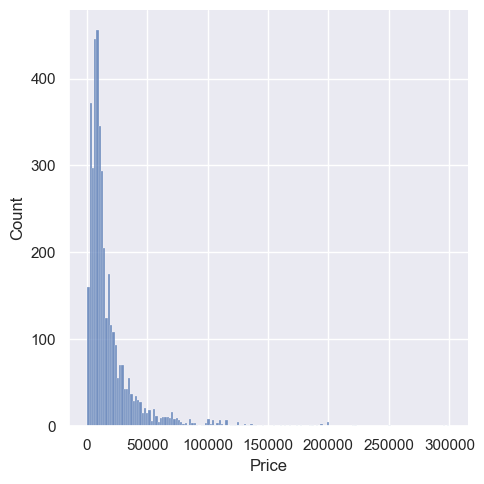

In [66]:
sns.displot(df_new['Price'])

In [67]:
df_new = df_new[df_new['Price'] < df_new['Price'].quantile(0.99)]
df_new.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


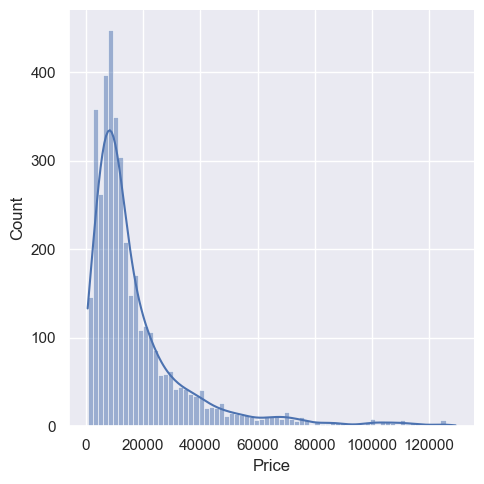

In [68]:
sns.displot(df_new['Price'],kde=True)

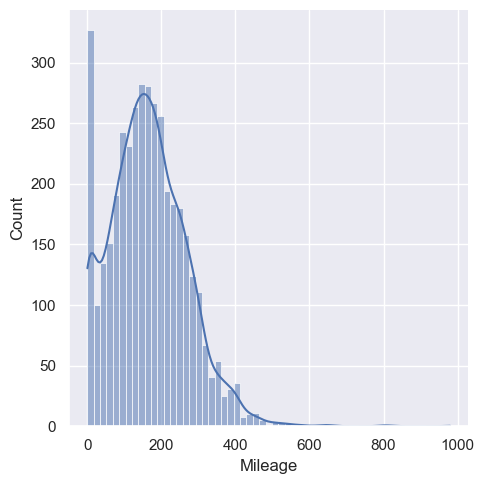

In [69]:
sns.displot(df_new.Mileage,kde=True)

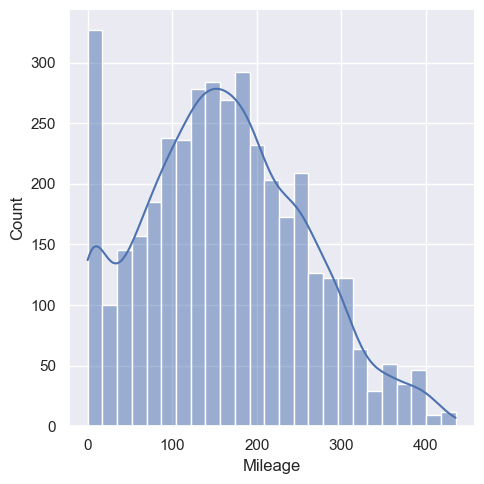

In [70]:
df_new = df_new[df_new.Mileage < df_new.Mileage.quantile(0.99)]
sns.displot(df_new.Mileage,kde=True)

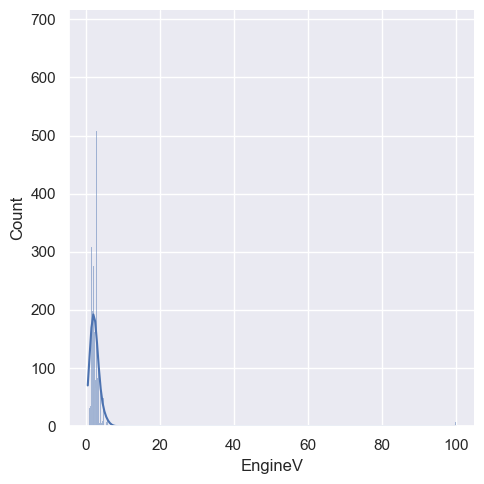

In [71]:
sns.displot(df_new.EngineV,kde=True)

### A quick search on the internet shows that an engine volume interval should lie between 0.6 and 6.5

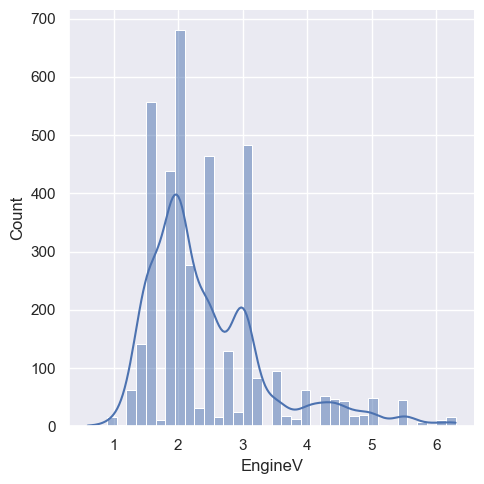

In [72]:
df_new = df_new[df_new.EngineV < 6.5]
sns.displot(df_new.EngineV, kde=True)

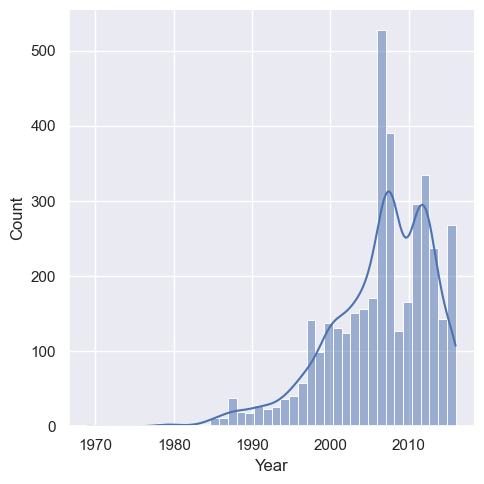

In [73]:
sns.displot(df_new.Year,kde=True)

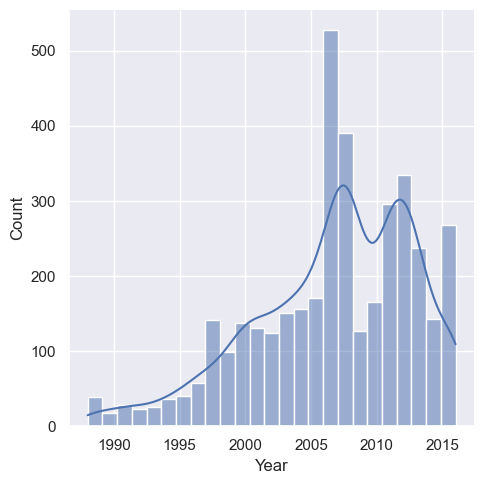

In [74]:
df_new = df_new[df_new.Year > df_new.Year.quantile(0.01)]
sns.displot(df_new.Year,kde=True)

In [75]:
clean_df = df_new.reset_index(drop=True)

In [76]:
clean_df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### With this we are done with the preprocessing and can move on to the next step

## 2. Checking the OLS assumptions

### a. Linearity

Text(0.5, 1.0, 'EngineV and Price')

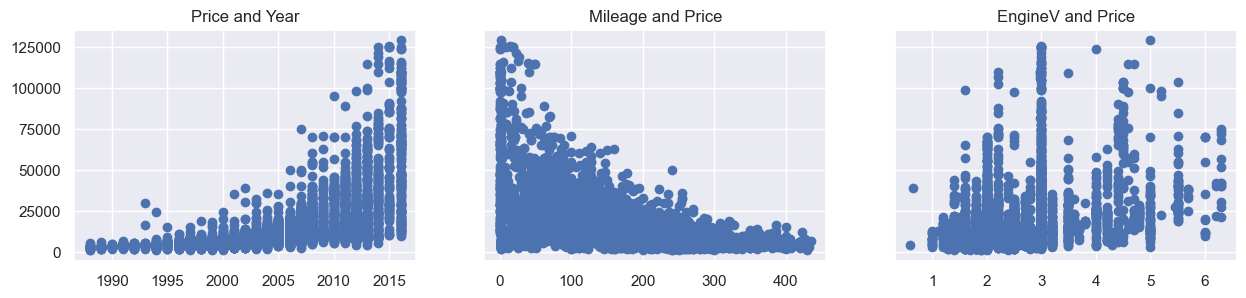

In [77]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(clean_df['Year'],clean_df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(clean_df['Mileage'],clean_df['Price'])
ax2.set_title('Mileage and Price')
ax3.scatter(clean_df['EngineV'],clean_df['Price'])
ax3.set_title('EngineV and Price')

In [78]:
# To solve for non linearity we apply a log function

log_price = np.log(clean_df.Price)
clean_df['log_price'] = log_price
clean_df.sample(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
993,Mitsubishi,5900.0,sedan,170,1.6,Petrol,yes,2007,8.682708
572,Audi,49700.0,crossover,80,3.0,Diesel,yes,2013,10.813760
3668,Mitsubishi,18500.0,crossover,135,3.0,Gas,yes,2009,9.825526
625,BMW,34400.0,crossover,37,2.0,Diesel,yes,2013,10.445812
1214,Toyota,8950.0,hatch,118,1.6,Petrol,yes,2008,9.099409


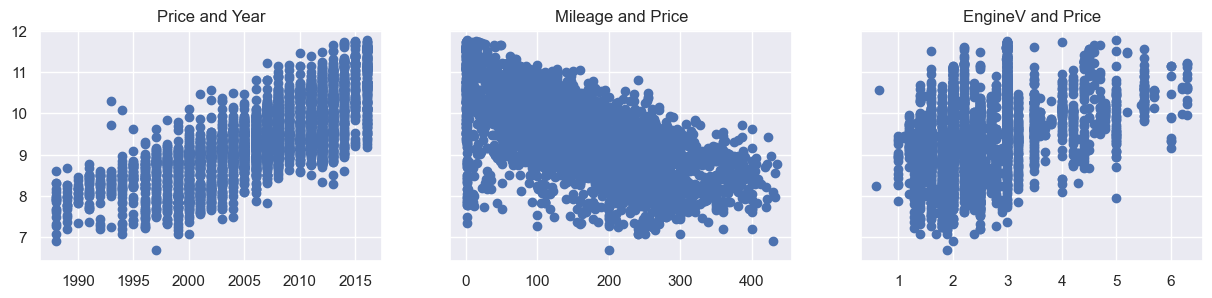

In [79]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(clean_df['Year'],clean_df['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(clean_df['Mileage'],clean_df['log_price'])
ax2.set_title('Mileage and Price')
ax3.scatter(clean_df['EngineV'],clean_df['log_price'])
ax3.set_title('EngineV and Price')
plt.show()

In [80]:
clean_df = clean_df.drop('Price', axis=1)
clean_df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### b. Multicollinearity

In [81]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

from statsmodels.stats.outliers_influence import variance_inflation_factor

# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = clean_df[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [82]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [83]:
# Since year has the highest vif, it will be removed from the data
clean_df = clean_df.drop('Year', axis = 1)
clean_df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [84]:
# we can now continue with preprocessing of the data
clean_df.Registration = clean_df.Registration.map({'yes':1, 'no':0})
clean_df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,1,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,1,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,1,9.495519
3,Audi,crossover,240,4.2,Petrol,1,10.043249
4,Toyota,crossover,120,2.0,Petrol,1,9.814656


In [85]:
dframe = pd.get_dummies(clean_df,dtype='b',drop_first=True) # Drop one to ensure no collinearity
dframe.head()

,Mileage,EngineV,Registration,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,1,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,1,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,1,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,1,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,1,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [86]:
dframe.columns

Index(['Mileage', 'EngineV', 'Registration', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'],
      dtype='object')

In [87]:
# Rearranging the columns to get some form of order
cols = dframe[['log_price', 'Registration', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
         'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
         'Engine Type_Other','Engine Type_Petrol']]
cols.head()

,log_price,Registration,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,1,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,1,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,1,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,1,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [88]:
cols.isna().sum()

log_price              0
Registration           0
Mileage                0
EngineV                0
Brand_BMW              0
Brand_Mercedes-Benz    0
Brand_Mitsubishi       0
Brand_Renault          0
Brand_Toyota           0
Brand_Volkswagen       0
Body_hatch             0
Body_other             0
Body_sedan             0
Body_vagon             0
Body_van               0
Engine Type_Gas        0
Engine Type_Other      0
Engine Type_Petrol     0
dtype: int64

## Linear Regression Model

In [89]:
inputs = cols.drop('log_price', axis = 1)
outputs = cols.log_price

### Scale the inputs

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [91]:
inputs_scaled[:2]

array([[ 0.32137366,  1.2179077 , -0.47452478,  2.27971827, -0.49255381,
        -0.29105409, -0.35463247, -0.38447151, -0.52998841, -0.26458559,
        -0.32527677,  1.27905896, -0.32624802, -0.43276889, -0.41493781,
        -0.16209221,  1.33267512],
       [ 0.32137366,  2.78660201,  0.47359854, -0.43865069,  2.03023504,
        -0.29105409, -0.35463247, -0.38447151, -0.52998841, -0.26458559,
        -0.32527677, -0.78182479, -0.32624802,  2.31070211, -0.41493781,
        -0.16209221, -0.75037043]])

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_scaled,outputs,test_size=0.2,random_state=42,shuffle=True)

In [93]:
len(X_train),len(X_test)

(3093, 774)

### Creating the model

In [94]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

### Testing and exploring the results

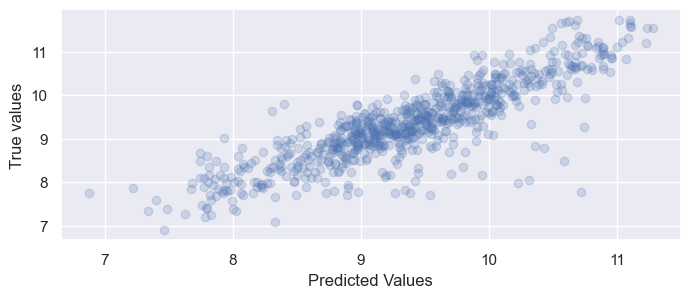

In [137]:
y_pred = reg_model.predict(X_test)

plt.figure(figsize=(8,3))
           
plt.scatter(y_pred,y_test,alpha=0.2)
plt.xlabel('Predicted Values')
plt.ylabel('True values')
plt.show()

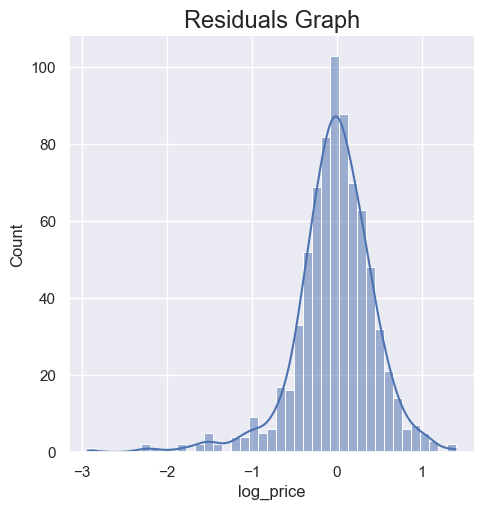

In [116]:
# we can plot the residual graph to check for anomalies in our model

sns.displot(y_test-y_pred, kde=True)

plt.title('Residuals Graph',size=17)
plt.show()

# our PDF is skewed to the left implying our predictions are higher than the actual values.

In [119]:
# creating a table showing actual values compared to the predicted values

df_pred = pd.DataFrame(np.exp(y_pred),columns = ['Y_predicted'])

In [120]:
df_pred['Target'] = y_test
df_pred.head()

,Y_predicted,Target
0,40419.308971,8.34284
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN


In [121]:
# indexing is not right hence has to be solved
y_test = y_test.reset_index(drop=True)
y_test[:4]

0    9.966462
1    9.093807
2    8.086410
3    9.392662
Name: log_price, dtype: float64

In [125]:
df_pred.drop('Target', axis=1, inplace = True)

In [127]:
df_pred['Target'] = np.exp(y_test)

In [129]:
df_pred['Residual'] = df_pred.Target - df_pred.Y_predicted
df_pred

,Y_predicted,Target,Residual
0,40419.308971,21300.0,-19119.308971
1,7956.895960,8900.0,943.104040
2,5757.284408,3250.0,-2507.284408
3,9765.810605,12000.0,2234.189395
4,7027.363814,5400.0,-1627.363814
...,...,...,...
769,4699.586013,4200.0,-499.586013
770,9123.067372,8800.0,-323.067372
771,6267.803094,4850.0,-1417.803094
772,20906.128600,27000.0,6093.871400


In [131]:
df_pred['Difference in %'] = np.absolute((df_pred.Residual/df_pred.Target)*100)
df_pred.head()

,Y_predicted,Target,Residual,Difference in %
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367


In [133]:
pd.options.display.max_rows = 999 # to see all the rows

pd.set_option('display.float_format', lambda x: '%.2f' % x) # to have all values rounded off to 2 decimal places

df_pred.sort_values(by=['Difference in %']) # to sort by difference

,Y_predicted,Target,Residual,Difference in %
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
262,52180.11,52055.25,-124.86,0.24
674,3107.51,3100.00,-7.51,0.24
648,9675.57,9700.00,24.43,0.25
79,21407.59,21335.00,-72.59,0.34
313,9865.72,9900.00,34.28,0.35


In [153]:
train_score = reg_model.score(X_train,y_train)
test_score = reg_model.score(X_test,y_test)

print(f'Accuracy on train dataset: {round(train_score,4)}\nAccuracy on test dataset: {round(test_score,4)}')

Accuracy on train dataset: 0.7546
Accuracy on test dataset: 0.7353
